# DIP Assignment 2
This notebook answerd the question of DIP Assignment 2, filters

In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Question 1 (Modified filters)

- We will first create a filtering function
- Run the new filters on it

In [2]:
# Our filtering function (assuming that im is already padded)
# It converts the matrix to a 4-d array
# im => image or input
# fil => filter
# return filtred image
def filter(im, fil):
    fil = np.array(fil)
    # Get the shape of the 4d array needed for filtering     
    view_shape = tuple(np.subtract(im.shape, fil.shape) + 1) + fil.shape
    strd = np.lib.stride_tricks.as_strided
    # Get the new view of the array as required for filtering     
    subM = strd(im, shape = view_shape, strides = im.strides * 2)
    # for every i,j element in filter with <k,l> 2d array of subM
    # and return thier sum of as an i,j 2d array   
    return np.einsum('ij,ijkl->kl',fil,subM.T).T

# 1.a Run on new filters

In [3]:
# Load image
im = Image.open('./input_data/sky.jpeg').convert('L')
fil = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]])
filtered_im = filter(np.array(im), fil)
# Display new and old images
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(im)
ax1.axis('off')
ax1.set_title('Original B&W Image')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(filtered_im, cmap='gray')
ax2.axis('off')
ax2.set_title('Filtered Image')

Text(0.5,1,'Filtered Image')

In [4]:
# Load image
im = Image.open('./input_data/sky2.jpg').convert('L')
fil = np.array([
    [1,0,0],
    [0,-1,0],
    [0,0,1]])
filtered_im = filter(np.array(im), fil)
# Display new and old images
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(im)
ax1.axis('off')
ax1.set_title('Original B&W Image')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(filtered_im, cmap='gray')
ax2.axis('off')
ax2.set_title('Filtered Image')

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 2. 
  warnings.warn(str(msg))


Text(0.5,1,'Filtered Image')

# 1.b Compare results with given filter

In [5]:
# Load image
im = Image.open('./input_data/sky.jpeg').convert('L')
fil1 = np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]])

fil2 = fil1/16

filtered_im1 = filter(np.array(im), fil1)
filtered_im2 = filter(np.array(im), fil2)

# Display new and old images
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(im)
ax1.axis('off')
ax1.set_title('Original B&W Image')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(filtered_im2, cmap='gray')
ax2.axis('off')
ax2.set_title('Given Filter')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(filtered_im1, cmap='gray')
ax3.axis('off')
ax3.set_title('Wrong Filter')

Text(0.5,1,'Wrong Filter')

In [6]:
# Load image
im = Image.open('./input_data/sky.jpeg').convert('L')
fil1 = np.array([
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]])

fil2 = fil1/256

filtered_im1 = filter(np.array(im), fil1)
filtered_im2 = filter(np.array(im), fil2)

# Display new and old images
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(im)
ax1.axis('off')
ax1.set_title('Original B&W Image')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(filtered_im2, cmap='gray')
ax2.axis('off')
ax2.set_title('Given Filter')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(filtered_im1, cmap='gray')
ax3.axis('off')
ax3.set_title('Wrong Filter')

Text(0.5,1,'Wrong Filter')

In [7]:
# Load image
im = Image.open('./input_data/sky.jpeg').convert('L')
fil1 = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]])

fil2 = fil1 + fil1

filtered_im1 = filter(np.array(im), fil1)
filtered_im2 = filter(np.array(im), fil2)

# Display new and old images
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(im)
ax1.axis('off')
ax1.set_title('Original B&W Image')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(filtered_im2, cmap='gray')
ax2.axis('off')
ax2.set_title('Given Filter')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(filtered_im1, cmap='gray')
ax3.axis('off')
ax3.set_title('Wrong Filter')

Text(0.5,1,'Wrong Filter')

# 1.c
- Sum filter sum to 1 because if they don't they, would overflow at some pixel values.
- Sum filters sum to 0 because most of them are used for edge detection or for finding change in the intensity of pixels in a region. If they dont sum to 0 they would give a weighted difference which will lead to wrong analysis.

# Question 2
- Part 1

        Yes it is a linear operator by defination,If we take x and y as 2 matries and A as the linear operator. If z = ax + by for some constants a,b then A(z) = aA(x) + bA(b)
- Part 2

        A must be an 1 x n*m matrix where first n elements are 1 and rest are 0

- Part 3
        Images which would have all elements of first row having value 0 would make a null space. Hence elements of this null space will give return a n-d vector of value 0 in all cases.

# Question 3

![Q3](./output_data/q3.jpeg)

# Question 4

In [8]:
def gradient_filters(fil_x, fil_y):
    im = Image.open('./input_data/barbara.jpg').convert('L')
    im = np.array(im)
    im_x = filter(im,fil_x)
    im_y = filter(im,fil_y)
    
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(im, cmap='gray')
    ax1.axis('off')
    ax1.set_title('Original B&W Image')

    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(im_x, cmap='gray')
    ax2.axis('off')
    ax2.set_title('Mx')

    ax3 = fig.add_subplot(2,2,3)
    ax3.imshow(im_y, cmap='gray')
    ax3.axis('off')
    ax3.set_title('My')
    
    ax4 = fig.add_subplot(2,2,4)
    ax4.imshow(np.sqrt(im_y**2 + im_x**2) , cmap='gray')
    ax4.axis('off')
    ax4.set_title('Gradient Filter')
    


In [9]:
# Robert Filter
Mx = [[0,1], 
      [-1,0]]
My = [[0,1],
      [-1,0]]

gradient_filters(Mx,My)

In [10]:
# Prewitt Filter
Mx = [[-1,0,1], 
      [-1,0,1],
      [-1,0,1]]
My = [[1,1,1], 
      [0,0,0],
      [-1,-1,-1]]

gradient_filters(Mx,My)

In [11]:
# Sobel Filter
Mx = [[-1,0,1], 
      [-2,0,2],
      [-1,0,1]]
My = [[1,2,1], 
      [0,0,0],
      [-1,-2,-1]]

gradient_filters(Mx,My)

In [12]:
# Laplacian Filter
Mx = [[0,-1,0], 
      [-1,4,-1],
      [0,-1,0]]
My = [[-1,-1,-1], 
      [-1,8,-1],
      [-1,-1,-1]]

gradient_filters(Mx,My)
# Ignore 4th image

# Question 5
![Q5](./output_data/q5.jpeg)

# Question 6
![Q6](./output_data/q6.jpeg)

# Question 7

In [13]:
A = 2
fil = np.array([
    [-1,-4,-7,-4,-1],
    [-4,-16,-26,-16,-4],
    [-7,-26,273*A - 41,-26,-7],
    [-4,-16,-26,-16,-4],
    [-1,-4,-7,-4,-1],
])
fil = fil if A ==1 else fil/(273*(A-1))

# Perform unmasking 
im = Image.open('./input_data/face.jpg').convert('L')
filtered_im = filter(np.array(im), fil)
# Display new and old images
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(im)
ax1.axis('off')
ax1.set_title('Original B&W Image')

ax2 = fig.add_subplot(2,1,2)
ax2.imshow(im + np.pad(filtered_im,(2,), 'constant'), cmap='gray')
ax2.axis('off')
ax2.set_title('Filtered Image')

Text(0.5,1,'Filtered Image')

# Question 8
![Q6](./output_data/8.jpeg)

# Question 9

In [14]:
def lowpass(im,k,efficent=True):
    fil = np.ones((k,k))/k**2
    start = time.time()
    if efficent:
        filtered_im = filter(im,fil)
        filtered_im = np.pad(filtered_im,(2,), 'constant')
    else:
        w,h = im.shape
        filtered_im = np.zeros(im.shape)
        for i in range(k//2,w-k//2):
            for j in range(k//2,h-k//2):
                filtered_im[i,j] = np.sum(fil*im[i-k//2:i+k//2 +1,j-k//2:j+k//2 + 1])
    
    end = time.time()
    return end - start,filtered_im
    

k: 1
k: 3
k: 5
k: 7
k: 9
k: 11
k: 13
k: 15
k: 17
k: 19


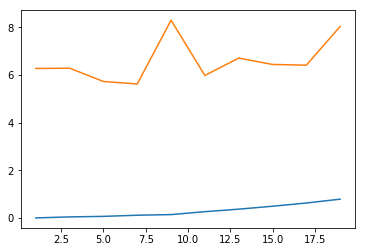

In [197]:
im = Image.open('./input_data/barbara.jpg')
im = np.array(im)
efficent_filtering = []
non_efficent_filtering = []
for i in range(1,21,2):
    print("k:",i)
    t,new_im = lowpass(im,i)    
    efficent_filtering.append(t)
    t,new_im = lowpass(im,i,efficent=False)
    non_efficent_filtering.append(t)

x = range(1,21,2)
plt.plot(x,efficent_filtering)
plt.plot(x,non_efficent_filtering)
plt.show()

# 9.c Efficient Median Filter

In [16]:
def median_filter(im, k):
    # Get the shape of the 4d array needed for filtering     
    view_shape = tuple(np.subtract(im.shape, (k,k)) + 1) + (k,k)
    strd = np.lib.stride_tricks.as_strided
    # Get the new view of the array as required for filtering     
    subM = strd(im, shape = view_shape, strides = im.strides * 2)
    # for every i,j element in filter with <k,l> 2d array of subM
    # and return thier sum of as an i,j 2d array   
    return np.median(subM,axis=(2,3))

In [17]:
im = np.array([[7,8,4,5,5],
    [5,9,4,3,8],
    [5,2,7,2,2],
    [6,1,9,2,4],
    [3,2,6,9,4]])
median_filter(im,3)

array([[5., 4., 4.],
       [5., 3., 4.],
       [5., 2., 4.]])

# Question 10

In [18]:
im = Image.open('./input_data/face.jpg').convert('L')
im = np.array(im)
plt.imshow(median_filter(im,21),cmap='gray')

In [136]:
def bilinear_filter(im,k=5,ad=2,ar=2):
    w,h = im.shape    
    view_shape = tuple(np.subtract(im.shape, (k,k)) + 1) + (k,k)

    # Create a gausian filter    
    g_x,g_y = np.meshgrid(np.linspace(-(k//2),(k//2),k),np.linspace(-(k//2),(k//2),k))    
    domain_kernel = np.exp(-(g_x**2 + g_y**2)/(2*(ad**2)))

    strd = np.lib.stride_tricks.as_strided
    subM = strd(im, shape = view_shape, strides = im.strides * 2)

    range_kernel = subM -subM[:,:,k//2,k//2][:,:,np.newaxis,np.newaxis]

    
    range_kernel = np.exp(-range_kernel/(2*ar**2))
    kernel = range_kernel * domain_kernel
    
    filtered_im = np.sum(kernel*subM,axis=(2,3))/np.sum(kernel,axis=(2,3))
    return filtered_im

In [247]:
def run_filters(path,k=5,ad=5,ar=30,it=4,verbose=True):
    im = Image.open(path).convert('L')
    # im = im.resize((400,400))
    im = np.array(im)
    for i in range(it):
        filtered_im = bilinear_filter(im,k=k,ad=ad,ar=ad)
        if verbose:
            fig = plt.figure(figsize=(16,16))
            ax1 = fig.add_subplot(1,2,1)
            ax1.imshow(im, cmap='gray')
            ax1.axis('off')
            ax1.set_title('Original B&W Image')

            ax2 = fig.add_subplot(1,2,2)
            ax2.imshow(filtered_im, cmap='gray')
            ax2.axis('off')
            ax2.set_title('Filtered Image')
            print(filtered_im.shape)
            im = filtered_im
    return filtered_im

(846, 1276)
(842, 1272)
(838, 1268)
(834, 1264)


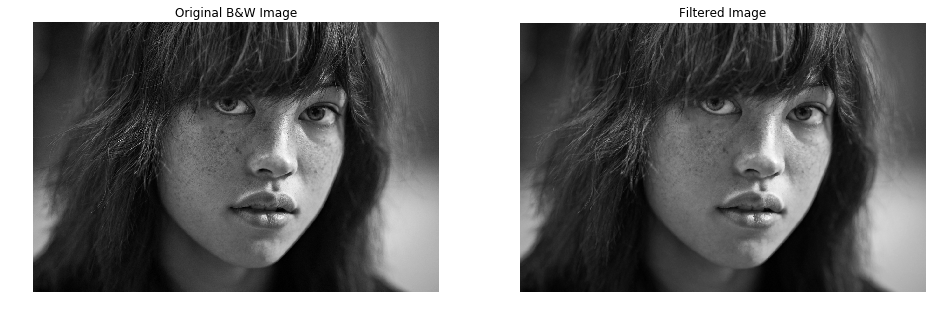

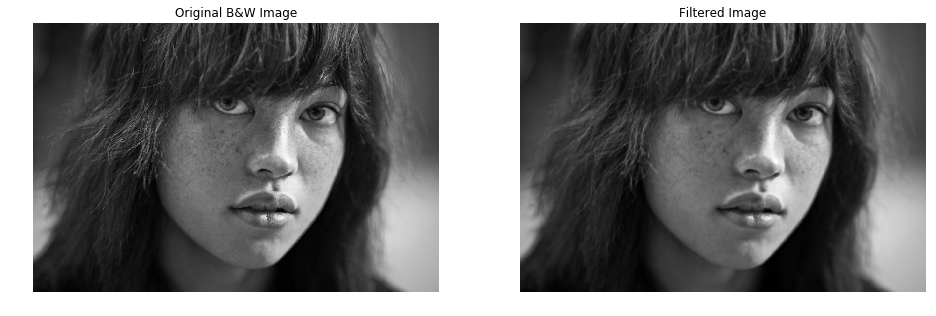

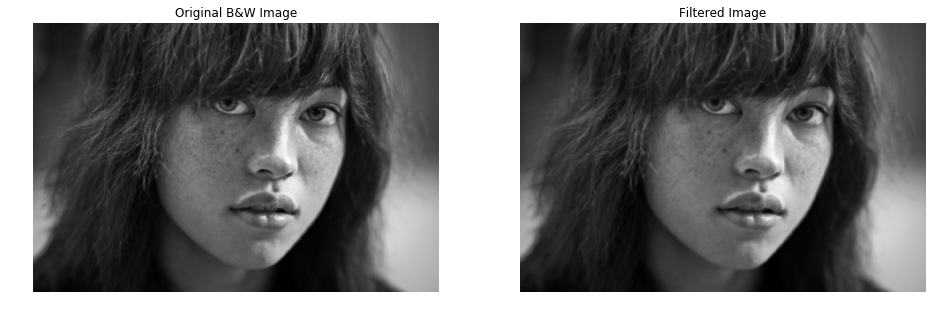

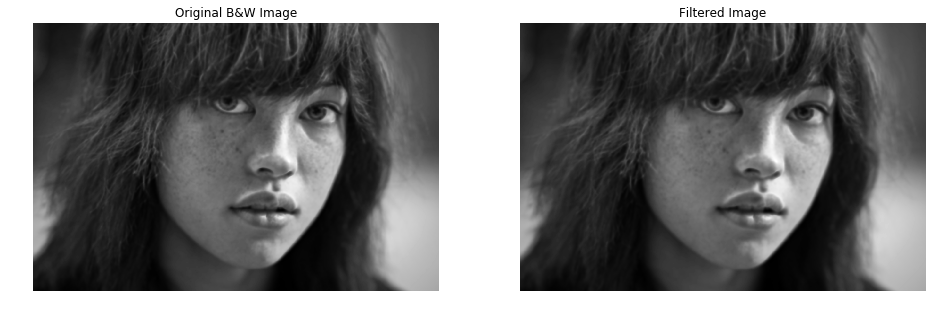

In [248]:
x = run_filters('./input_data/face.jpg')

(317, 317)
(314, 314)
(311, 311)
(308, 308)


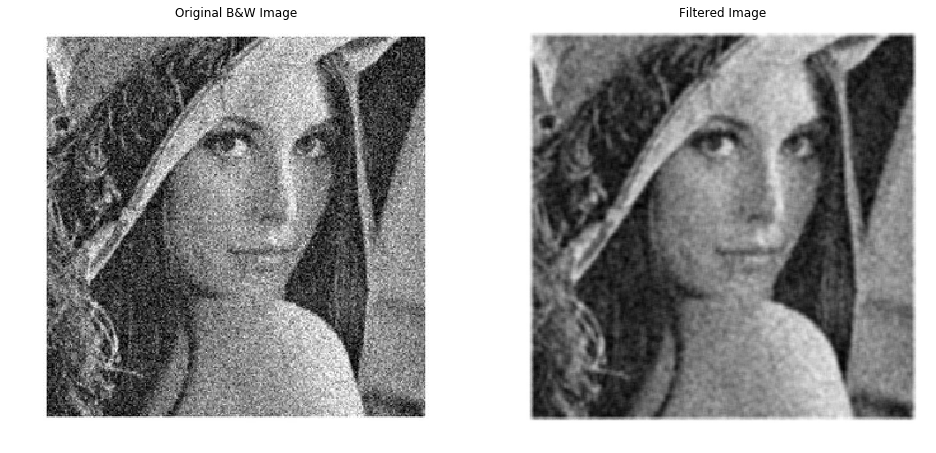

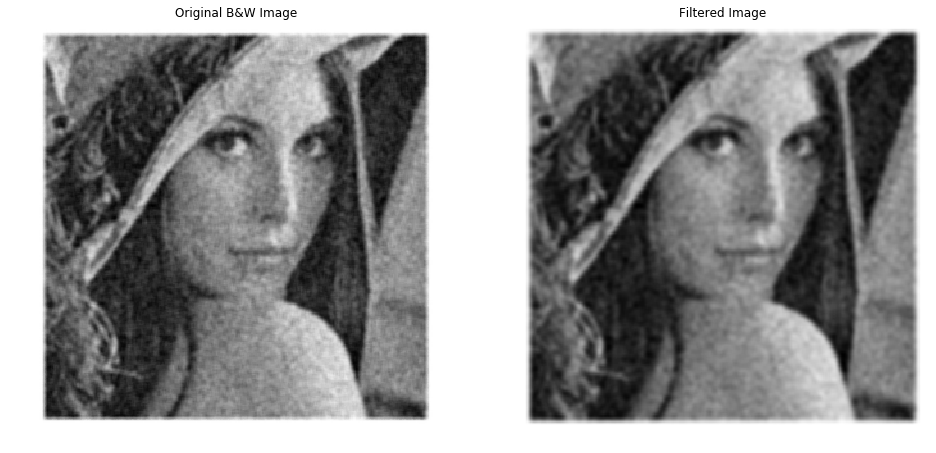

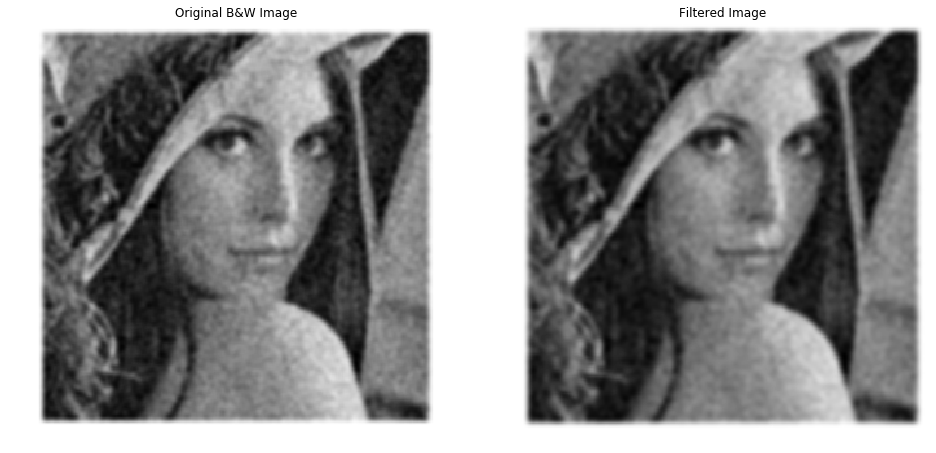

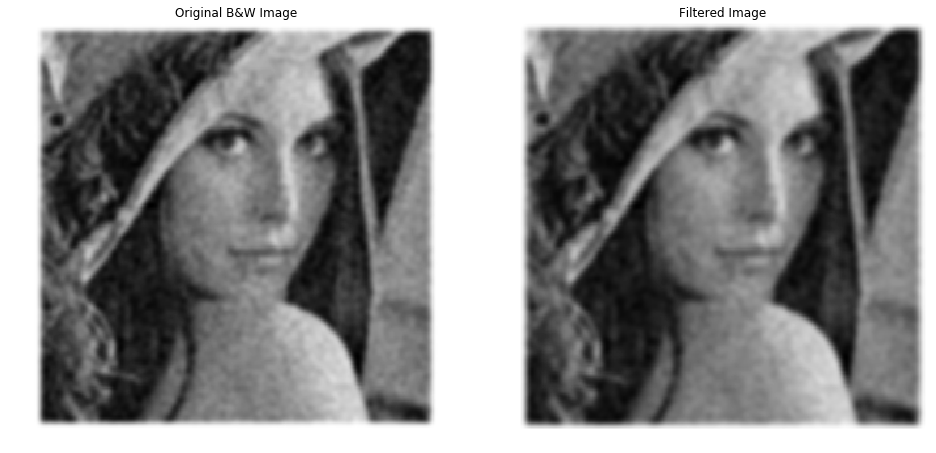

In [249]:
x = run_filters('./input_data/lena.jpg',ad=20,ar=45,k=4)

### 10 b
- On of intensity discontinuity it will try to preserve the intensity because range filter will have a higher component than the gaussian filter which is trying to blur it.
- Bilinear filtering vs Highboost => Highboost only take care of sharp edges but not the change in intensity but bilinear filter takes in account the change in intensity 

In [260]:
im = Image.open('input_data/barbara.jpg')
im = np.array(im)
A = 5
highboost = A*im - lowpass(im,k=5)[1]
filtered_im = run_filters('input_data/barbara.jpg',verbose=False)

Text(0.5,1,'Bilinear Filtered Image')

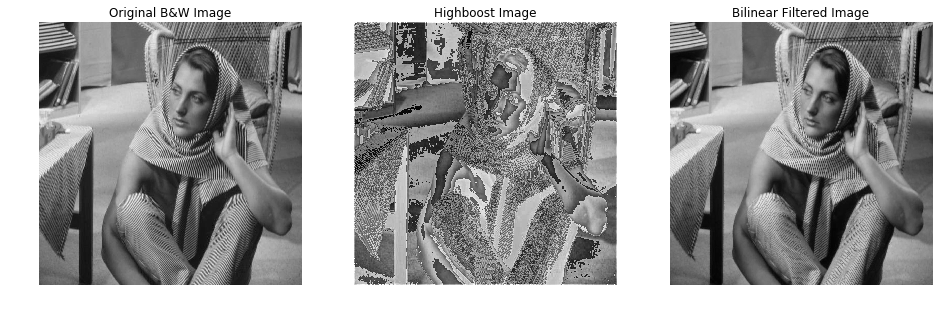

In [261]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(im, cmap='gray')
ax1.axis('off')
ax1.set_title('Original B&W Image')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(highboost, cmap='gray')
ax2.axis('off')
ax2.set_title('Highboost Image')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(filtered_im, cmap='gray')
ax3.axis('off')
ax3.set_title('Bilinear Filtered Image')

# 10c 
- Increase in ad/ar increases the smoothing effect of domain kernel 
- Decrease in ad/ar increases the sharpening of the image but image doesn't change much

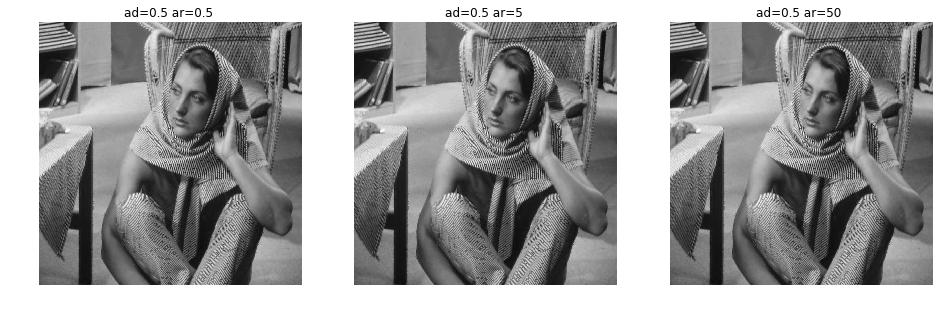

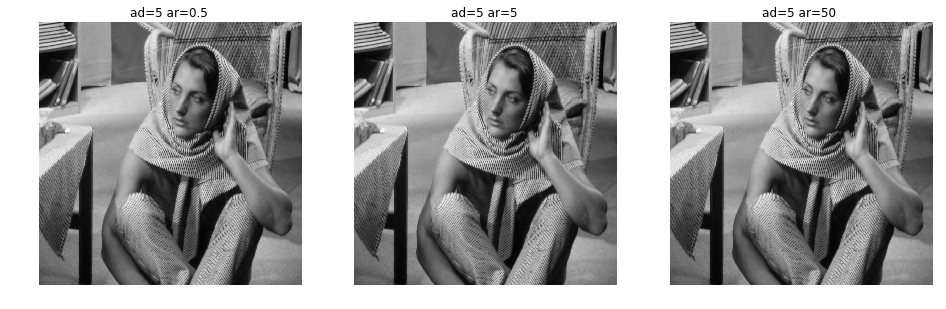

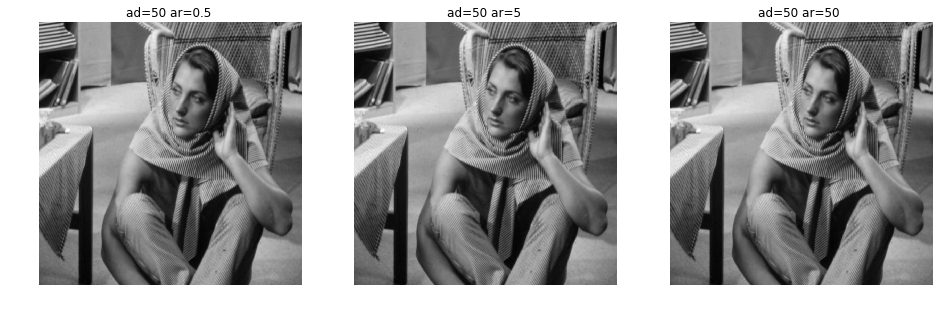

In [276]:
cases = [0.5,5,50]
for i in range(3):
    fig = plt.figure(figsize=(16,8))
    for j in range(3):
        ax = fig.add_subplot(1,3,j + 1)
        filtered_im = run_filters('input_data/barbara.jpg',verbose=False, ad=cases[i], ar=cases[j])        
        ax.imshow(filtered_im, cmap='gray')
        ax.axis('off')
        ax.set_title('ad={} ar={} '.format(cases[i],cases[j]))
plt.show()